In [218]:
import numpy as np
from scipy.interpolate import approximate_taylor_polynomial
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

def construct_hamiltonian(N, x, dx, h_bar, mass, q):
    potential =  (mass * x**2 * q**2)/2
    potential = np.diag(potential)

    hamiltonian = np.zeros((N, N))
    
    finite_diff = -2 * np.eye(N)
    finite_diff += np.eye(N, k=1)
    finite_diff += np.eye(N, k=-1)
    
    #kinetic = h_bar**2 / (2 * mass * dx**2) * finite_diff\
    kinetic = -h_bar**2 / (2 * mass) * (finite_diff/dx**2)
    
    hamiltonian = kinetic + potential#*np.eye(N)

    return hamiltonian

def time_evolution(hamiltonian, terms, time, mass, h_bar):
    te_operator = np.exp((-1j * hamiltonian * time)/h_bar)
    #final_teo = taylor_series_expansion(hamiltonian, terms, time)
    #te_operator = taylor_series_expansion(te_operator, 4)
    #taylor = approximate_taylor_polynomial(te_operator, 0, degree = 4, scale = 1)
    #eturn final_teo

def taylor_series_expansion(matrix, terms, t):
    n = matrix.shape[0]
    identity = np.eye(n, dtype=np.complex128)
    result = identity.copy()
    matrix_power = matrix.copy()

    # Expand time evolution operator e^(-itH)
    for i in range(1, terms + 1):
        term = (matrix_power**i) * (t**i) * (-1j**i) / np.math.factorial(i)
        result += term

    return result


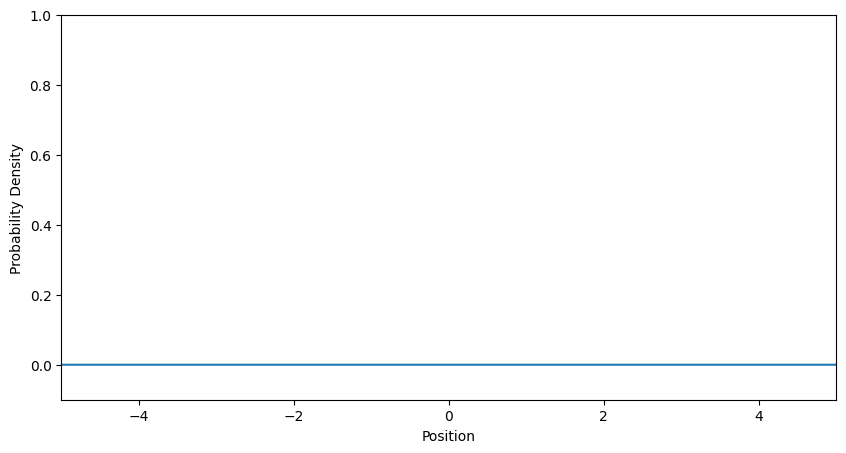

<Figure size 1000x500 with 0 Axes>

In [223]:
x_min = -5.0
x_max = 5.0
N = 250

# Create the grid
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define the physical parameters
mass = 1
h_bar = 1#.05457e-35
q = 1#np.pi#10

hamiltonian = construct_hamiltonian(N, x, dx, h_bar, mass, q)

eigval, eigvec = np.linalg.eigh(hamiltonian)

#initial_wavefunction = eigvec[:, 0]

initial_state = -eigvec.T


t = 0
t_max = 1
t_steps = 300
t_values = np.linspace(t, t_max, t_steps)
dt = t_values[1] - t_values[0]
count = 0

all_states = np.zeros((t_steps, N))

fig, ax = plt.subplots(figsize=(10, 5))

while t <= t_max:

    if t == 0:
        final_state = initial_state.copy()
        final_state = final_state/np.linalg.norm(final_state)
    
    else:

        teo = taylor_series_expansion(hamiltonian, 6,  dt)
        new_state = np.dot(teo, final_state)
        final_state = final_state.astype(np.complex128)
        final_state = new_state.copy()
        final_state = final_state/np.linalg.norm(final_state)


    # np.matmul seems to make more sense than np.dot, but they provide identical results. Misterpretation of the function?
    # need np.abs?
    plt.plot(x, np.abs(final_state[0])**2)
    plt.xlim([-5,5])
    plt.ylim([-.1,1])

    plt.xlabel("Position")
    plt.ylabel("Probability Density")
    clear_output(wait=True)  
    display(fig) 
    fig.clear() 
    #time.sleep(10)

    t += dt
    count += 1


#print(np.trapz((final_state[0]), dx=100))
#plt.tight_layout()
#plt.show
#print(all_states)
#plt.imshow(all_states)

Text(0, 0.5, 'Probability Distribution')

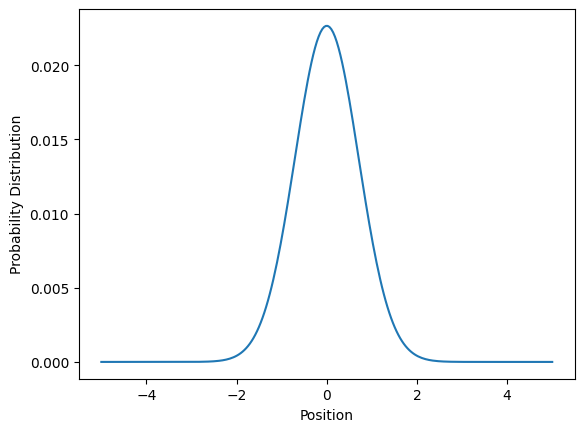

In [220]:
#plt.subplot(1,2,1)
#plt.plot(x,np.real(np.sqrt(initial_state[0] * np.conj(initial_state[0]))))
#plt.plot(x,(np.real(initial_state[0]/np.sqrt(np.dot(initial_state[0], np.conj(initial_state[0]))*dx))))
plt.plot(x,np.abs(initial_state[0])**2)
#plt.ylim([-1, 1])
#plt.xlim([-2, 2])
plt.xlabel("Position")
plt.ylabel("Probability Distribution")
#print(teo*teo)

In [44]:
print(hamiltonian.dtype, initial_state.dtype, final_state.dtype, new_state.dtype, teo.dtype)

AttributeError: 'MutableDenseMatrix' object has no attribute 'dtype'